In [1]:
import os
import glob
import scanpy as sc
import scanpy.external as sce
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from seaborn import despine
from seaborn import axes_style
import magic # imputation tool; van Dijk et al 2018 # 
from matplotlib.pyplot import suptitle
import matplotlib.colors
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import Patch # for clustermap legends
import time
from tqdm import tqdm

sc.settings.verbosity = 0  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)

/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


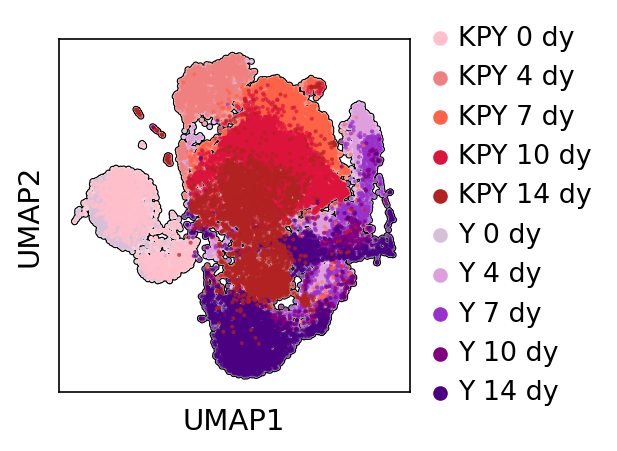

/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


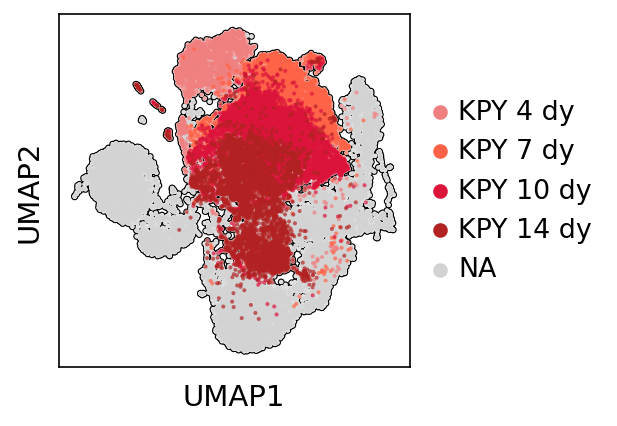

/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


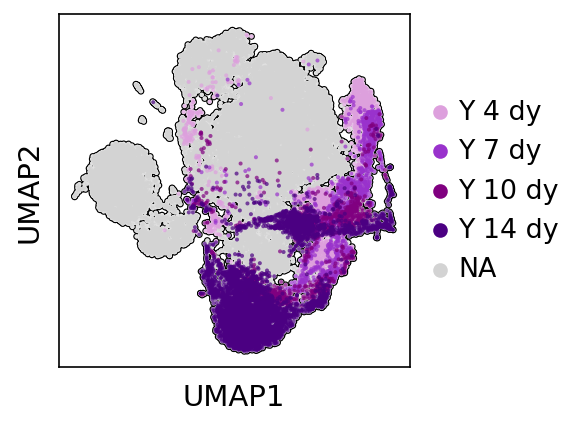

In [5]:
palette = ['pink', 'lightcoral', 'tomato', 'crimson', 'firebrick', 'thistle','plum','darkorchid','purple', 'indigo']

rcParams['figure.facecolor']='white'
rcParams['figure.figsize']=3,3
rcParams['figure.dpi'] = 150
sc.pl.umap(at2Cells, color=['yfp_time_annot'], wspace=0.6, frameon=True, legend_loc='right margin', add_outline=True, s=15, palette=palette, title='')
sc.pl.umap(at2Cells, color=['yfp_time_annot'], groups=['KPY 4 dy','KPY 7 dy','KPY 10 dy','KPY 14 dy'], wspace=0.6, frameon=True, legend_loc='right margin', add_outline=True, s=15, palette=palette, title='')
sc.pl.umap(at2Cells, color=['yfp_time_annot'], groups=['Y 4 dy','Y 7 dy','Y 10 dy','Y 14 dy',], wspace=0.6, frameon=True, legend_loc='right margin', add_outline=True, s=15, palette=palette, title='')

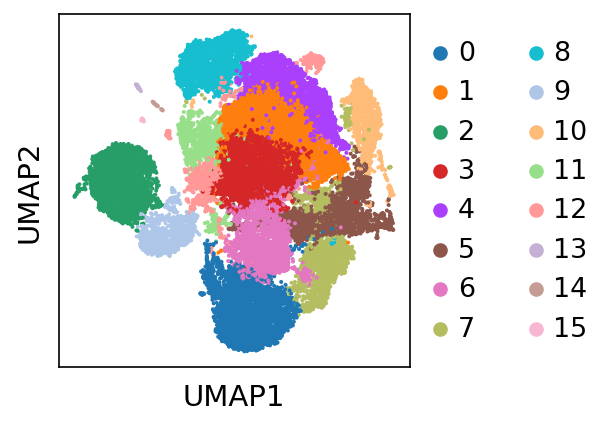

In [80]:
palette =  [
'#1f77b4',
'#ff7f0e',
'#279e68',
'#d62728',
'#aa40fc',
'#8c564b',
'#e377c2',
'#b5bd61',
'#17becf',
'#aec7e8',
'#ffbb78',
'#98df8a',
'#ff9896',
'#c5b0d5',
'#c49c94',
'#f7b6d2']

rcParams['figure.facecolor']='white'
rcParams['figure.figsize']=3,3
rcParams['figure.dpi']= 150
sc.pl.umap(at2Cells, color=['leiden0_2'], wspace=0.6, frameon=True, legend_loc='right margin', add_outline=False, s=15, title='', palette=palette)

#### Find cluster specific TFs

In [4]:
# Create a list of TFs

# Load TF database
# http://bioinfo.life.hust.edu.cn/AnimalTFDB/#!/download
tfdb3_df = pd.read_csv('/n/data2/bch/hemonc/ckim/AARON/20190715_KPY_timecourse/data_analysis/mice/scanpy_analysis/TFDB3_Mus_musculus_TF.csv', header=0)
# Keep tfs common in both datasets
tfdb3_genes = set(tfdb3_df['Symbol'].tolist())
print('TFs common in both databases:', len(tfdb3_genes))

# Load the DE data
result = at2Cells.uns['rank_genes_genotype_timepoint']
groups = result['names'].dtype.names
de_data = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'pvals_adj','logfoldchanges']})

# generate cluster list
clusters = ['Y 4 dy','Y 7 dy','Y 10 dy','Y 14 dy','KPY 4 dy','KPY 7 dy','KPY 10 dy','KPY 14 dy']

# Filter for significant DE genes, then visualize
search_dict = {}

for i in clusters:
    df1 = de_data.loc[(de_data[f'{i}_p'] < 0.01)] # p val threshold
    df1 = de_data.loc[(de_data[f'{i}_l'] > 0.5)] # log FC threshold 
    df1 = df1[[f'{i}_n',f'{i}_p',f'{i}_l']]
    df1 = df1.sort_values(by=f'{i}_l', ascending=False) # sort
    All = df1[f'{i}_n'].tolist() # will be order by p val
    print(f'Total sig genes in {i}:', len(All))
    top_tf = [x for x in All if x in tfdb3_genes] 
    print(f'Total TFs in {i}:', len(top_tf))
    top = top_tf[:10] # can select the number of genes used for visualization if desired
    print(f'# appended sig genes in {i} with pval<0.01, log FC >0.05:', len(top))
    search_dict.update({f'{i} TFs': top})

TFs common in both databases: 1623
Total sig genes in Y 4 dy: 2325
Total TFs in Y 4 dy: 69
# appended sig genes in Y 4 dy with pval<0.01, log FC >0.05: 10
Total sig genes in Y 7 dy: 1126
Total TFs in Y 7 dy: 48
# appended sig genes in Y 7 dy with pval<0.01, log FC >0.05: 10
Total sig genes in Y 10 dy: 1543
Total TFs in Y 10 dy: 115
# appended sig genes in Y 10 dy with pval<0.01, log FC >0.05: 10
Total sig genes in Y 14 dy: 1685
Total TFs in Y 14 dy: 108
# appended sig genes in Y 14 dy with pval<0.01, log FC >0.05: 10
Total sig genes in KPY 4 dy: 2200
Total TFs in KPY 4 dy: 86
# appended sig genes in KPY 4 dy with pval<0.01, log FC >0.05: 10
Total sig genes in KPY 7 dy: 1937
Total TFs in KPY 7 dy: 57
# appended sig genes in KPY 7 dy with pval<0.01, log FC >0.05: 10
Total sig genes in KPY 10 dy: 1719
Total TFs in KPY 10 dy: 68
# appended sig genes in KPY 10 dy with pval<0.01, log FC >0.05: 10
Total sig genes in KPY 14 dy: 1260
Total TFs in KPY 14 dy: 100
# appended sig genes in KPY 14 dy

#### Plot Tf results as a heatmap

In [ ]:
scaled = sc.pp.scale(at2Cells, copy=True)

<ipython-input-14-c885ff11c76d>:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sub_scaled.obs['yfp_time_annot'] = sub_scaled.obs['yfp_time_annot'].cat.reorder_categories(list(order), ordered=True)


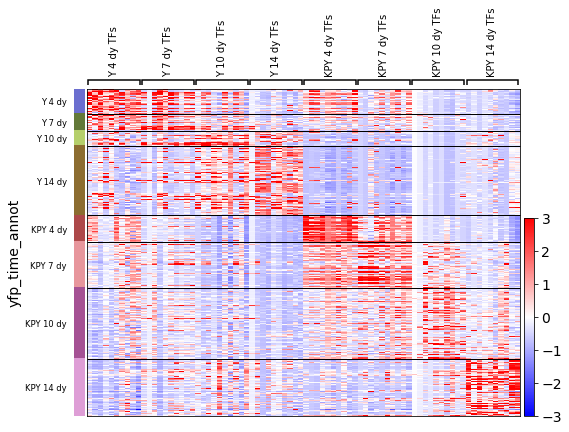

In [14]:
# Subset out 0 dy time points
sub_scaled = scaled[scaled.obs['yfp_time_annot'].isin(['Y 4 dy','Y 7 dy','Y 10 dy','Y 14 dy','KPY 4 dy','KPY 7 dy','KPY 10 dy','KPY 14 dy'])]

# change the cluster order
order = ['Y 4 dy','Y 7 dy','Y 10 dy','Y 14 dy','KPY 4 dy','KPY 7 dy','KPY 10 dy','KPY 14 dy']

# category ordering solution: https://github.com/scverse/scanpy/issues/550
sub_scaled.obs['yfp_time_annot'] = sub_scaled.obs['yfp_time_annot'].cat.reorder_categories(list(order), ordered=True)

# plot
sc.pl.heatmap(sub_scaled, search_dict, groupby='yfp_time_annot', cmap='bwr', use_raw=False, vmin=-3, vmax=3, swap_axes=False)

#### Plot Itga3 Src correlation over time

In [3]:
# Scale and create dataframe
scaled = sc.pp.scale(at2Cells, copy=True)

In [4]:
start = time.time()

input_df = pd.DataFrame(data=scaled.X, index=scaled.obs_names, columns=scaled.var_names)

df = input_df.copy()

# QC
print(len(df.columns) == len(at2Cells.var_names))

# Add pathways 
pathways=['leiden0_2','yfp_time_annot'] 
genes = ['Itga3','Itgb1','Src'] # genes and pathways of interest

for path in pathways:
    df[path]=scaled.obs[path]
    
df_input = df.T # makes cells columns 

lst = genes + pathways

df1 = df_input.loc[lst] # filter dataframe
print('# genes and scores used for plotting:', len(df1.index))

end = time.time()
print(f'Done. Total time (minutes):', (end - start)/60)

True
# genes and scores used for plotting: 5
Done. Total time (minutes): 1.2608789682388306


### Itga3 Src correlation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


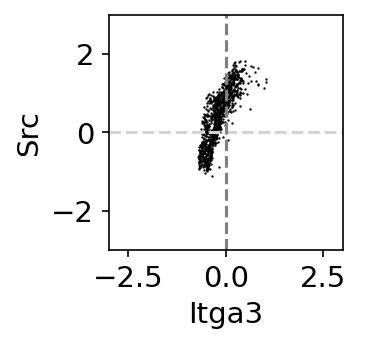

In [116]:
# Labels cells as proliferative or non-proliferative

df2 = df1.T
df2 = df2.loc[df2['leiden0_2'] == '10']

# plot proliferation vs s_score. Two sigs that should be present in proliferating cells.

plt.figure()
with axes_style({'axes.grid': False}):
    rcParams['figure.figsize'] = 2,2
    rcParams['figure.dpi'] = 150
    ax = sb.scatterplot(x="Itga3", y="Src", data=df2, edgecolor='black', linewidth=0.1, s=1, color='black')
    plt.axhline(y=0, c='lightgray', linestyle='dashed')
    plt.axvline(x=0, c='gray', linestyle='dashed')
    ax.legend(loc='center left', bbox_to_anchor=(1., 0.5), ncol=1, frameon=False)
    ax.set(ylim=(-3, 3))
    ax.set(xlim=(-3, 3))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


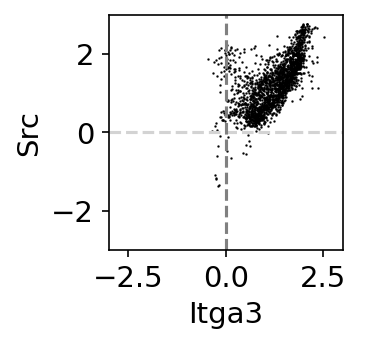

In [117]:
# Labels cells as proliferative or non-proliferative

df2 = df1.T
df2 = df2.loc[df2['leiden0_2'] == '8']

# plot proliferation vs s_score. Two sigs that should be present in proliferating cells.

plt.figure()
with axes_style({'axes.grid': False}):
    rcParams['figure.figsize'] = 2,2
    rcParams['figure.dpi'] = 150
    ax = sb.scatterplot(x="Itga3", y="Src", data=df2, edgecolor='black', linewidth=0.1, s=1, color='black')
    plt.axhline(y=0, c='lightgray', linestyle='dashed')
    plt.axvline(x=0, c='gray', linestyle='dashed')
    ax.legend(loc='center left', bbox_to_anchor=(1., 0.5), ncol=1, frameon=False)
    ax.set(ylim=(-3, 3))
    ax.set(xlim=(-3, 3))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


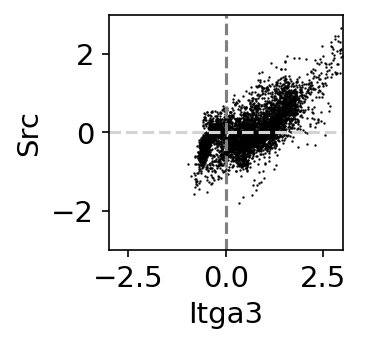

In [118]:
# Labels cells as proliferative or non-proliferative

df2 = df1.T
df2 = df2.loc[df2['leiden0_2'] == '1']

# plot proliferation vs s_score. Two sigs that should be present in proliferating cells.

plt.figure()
with axes_style({'axes.grid': False}):
    rcParams['figure.figsize'] = 2,2
    rcParams['figure.dpi'] = 150
    ax = sb.scatterplot(x="Itga3", y="Src", data=df2, edgecolor='black', linewidth=0.1, s=1, color='black')
    plt.axhline(y=0, c='lightgray', linestyle='dashed')
    plt.axvline(x=0, c='gray', linestyle='dashed')
    ax.legend(loc='center left', bbox_to_anchor=(1., 0.5), ncol=1, frameon=False)
    ax.set(ylim=(-3, 3))
    ax.set(xlim=(-3, 3))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


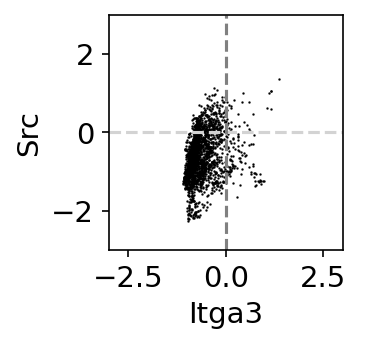

In [121]:
# Labels cells as proliferative or non-proliferative

df2 = df1.T
df2 = df2.loc[df2['leiden0_2'] == '6']

# plot proliferation vs s_score. Two sigs that should be present in proliferating cells.

plt.figure()
with axes_style({'axes.grid': False}):
    rcParams['figure.figsize'] = 2,2
    rcParams['figure.dpi'] = 150
    ax = sb.scatterplot(x="Itga3", y="Src", data=df2, edgecolor='black', linewidth=0.1, s=1, color='black')
    plt.axhline(y=0, c='lightgray', linestyle='dashed')
    plt.axvline(x=0, c='gray', linestyle='dashed')
    ax.legend(loc='center left', bbox_to_anchor=(1., 0.5), ncol=1, frameon=False)
    ax.set(ylim=(-3, 3))
    ax.set(xlim=(-3, 3))

### Deeper analysis of the three branch-point cell states in Y control AT2 organoids

/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


<AxesSubplot:title={'center':'leiden0_4'}, xlabel='FA1', ylabel='FA2'>

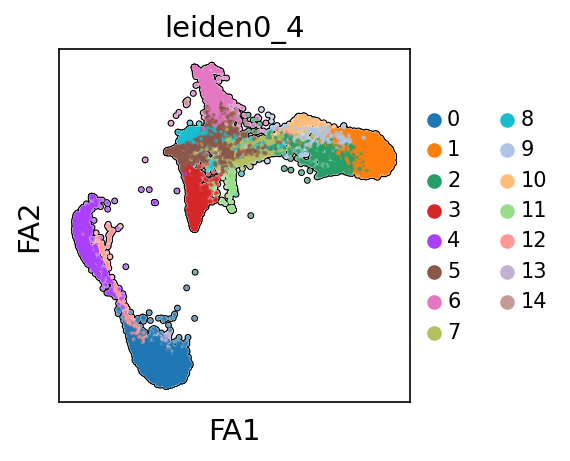

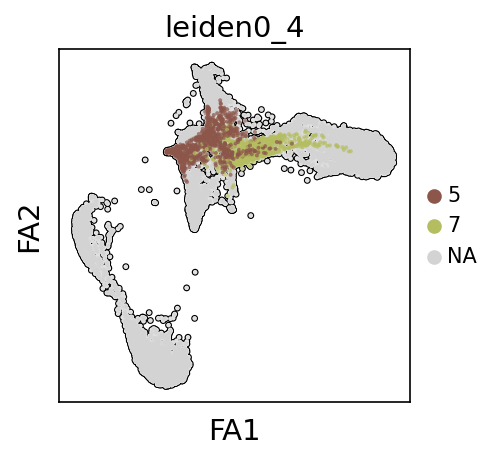

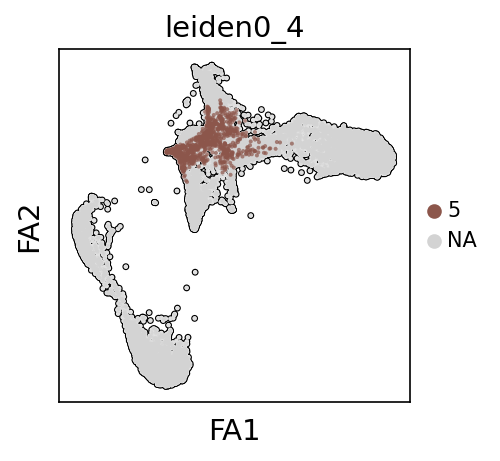

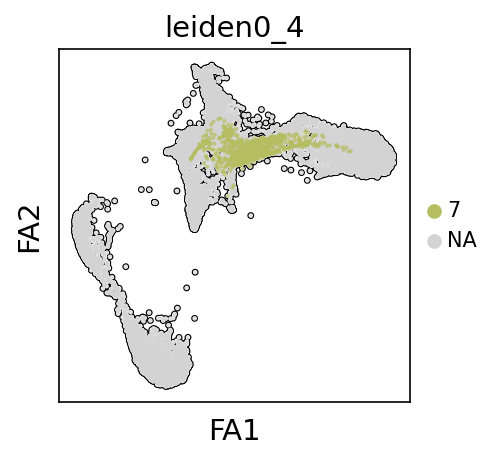

In [9]:
rcParams["figure.facecolor"]='white'
rcParams['figure.figsize'] = 3,3
sc.pl.draw_graph(Ycontrol2, color='leiden0_4', hspace=0.5, legend_fontsize=10,legend_loc='right margin', frameon=True, add_outline=True, s=15, show=False)
sc.pl.draw_graph(Ycontrol2, color='leiden0_4', groups=['5','7'], hspace=0.5, legend_fontsize=10,legend_loc='right margin', frameon=True, add_outline=True, s=15, show=False)

sc.pl.draw_graph(Ycontrol2, color='leiden0_4', groups=['5'], hspace=0.5, legend_fontsize=10,legend_loc='right margin', frameon=True, add_outline=True, s=15, show=False)
sc.pl.draw_graph(Ycontrol2, color='leiden0_4', groups=['7'], hspace=0.5, legend_fontsize=10,legend_loc='right margin', frameon=True, add_outline=True, s=15, show=False)

#### Subset the banch point clusters then recompute the 2D rep using FA2

<AxesSubplot:title={'center':'leiden0_4'}, xlabel='FA1', ylabel='FA2'>

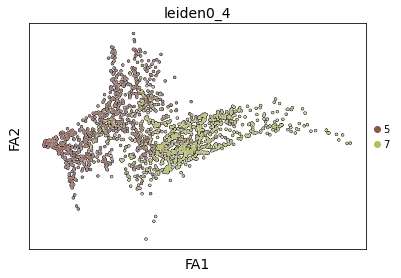

In [6]:
YcontrolSub = Ycontrol2[Ycontrol2.obs['leiden0_4'].isin(['5','7'])]

rcParams["figure.facecolor"]='white'
rcParams['figure.figsize'] = 3,3
sc.pl.draw_graph(YcontrolSub, color='leiden0_4', hspace=0.5, legend_fontsize=10,legend_loc='right margin', frameon=True, add_outline=True, s=15, show=False)

/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


<AxesSubplot:title={'center':'leiden0_4'}, xlabel='FA1', ylabel='FA2'>

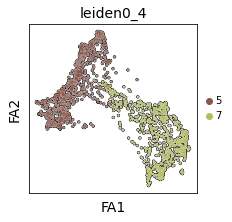

In [7]:
sc.tl.draw_graph(YcontrolSub) # recompute FA2 using subset clusters

# plot
rcParams["figure.facecolor"]='white'
rcParams['figure.figsize'] = 3,3
sc.pl.draw_graph(YcontrolSub, color='leiden0_4', hspace=0.5, legend_fontsize=10,legend_loc='right margin', frameon=True, add_outline=True, s=15, show=False)

<AxesSubplot:title={'center':'leiden0_4'}, xlabel='FA1', ylabel='FA2'>

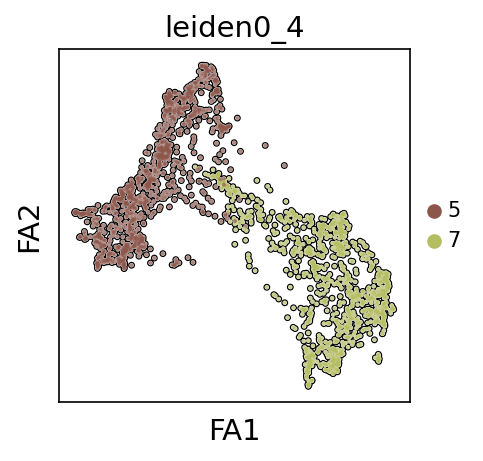

In [8]:
rcParams["figure.facecolor"]='white'
rcParams['figure.figsize'] = 3,3
rcParams['figure.dpi'] = 150
sc.pl.draw_graph(YcontrolSub, color='leiden0_4', hspace=0.5, legend_fontsize=10,legend_loc='right margin', frameon=True, add_outline=True, s=15, show=False)

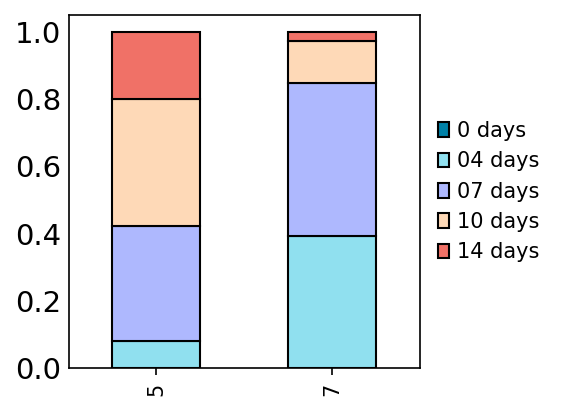

In [10]:
df=YcontrolSub.obs.copy()
df_plot = df.groupby(['leiden0_4', 'time point']).size().reset_index().pivot(columns='time point', index='leiden0_4', values=0)

# normalize rows
# Credit: https://stackoverflow.com/questions/26537878/pandas-sum-across-columns-and-divide-each-cell-from-that-value
df3 = df_plot.div(df_plot.sum(axis=1), axis=0)

order = ['0 days','04 days','07 days','10 days','14 days']
df3 = df3[order]

#df3 = df3.sort_values(by = ['0 days','14 days', '10 days'], ascending=[True, False, False])

# Manually order the rows according to yfpStatus contributions
df3 = df3.reindex(['5','7'])

# plot

color = ['#0081a7','#90e0ef','#aeb8fe','#fed9b7','#f07167']

rcParams['figure.figsize'] = 3,3
with axes_style({'axes.grid': False}):
    ax = df3.plot(kind='bar', stacked=True, edgecolor='black', color = color
                 )
    ax.legend(loc='center left', bbox_to_anchor=(1., 0.5), ncol=1, frameon=False, title='', 
    title_fontsize=10, fontsize=10)
    ax.set_xlabel("", rotation=0, labelpad=10, fontsize=10)
    ax.set_ylabel("", rotation=90, labelpad=10, fontsize=10)
    ax.set_xticklabels(df3.index, fontsize=10)
    #ax.set_yticklabels([0.0,0.5,1.0], fontsize=10)
    ax.tick_params(axis=u'y', which=u'both',length=0)
    #despine(right=True, left=True)

In [ ]:
### ngenes = 3000
method = 'wilcoxon'
lst=['leiden0_4']
anndata = YcontrolSub

for resolution in lst:
    print(f'Performing DE analysis for resolution={resolution}...')
    sc.tl.rank_genes_groups(anndata, groupby=resolution, key_added=f'rank_genes_{resolution}',
    method = method, n_genes=ngenes)

    # save data to adata_subset.uns
    result = anndata.uns[f'rank_genes_{resolution}']
    groups = result['names'].dtype.names

de_data = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'pvals_adj','logfoldchanges']})

# Save DE results
result = YcontrolSub.uns['rank_genes_leiden0_4']
groups = result['names'].dtype.names
de_data = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'pvals_adj','logfoldchanges']})

de_data.to_excel("/n/data2/bch/hemonc/ckim/AARON/20190715_KPY_timecourse/data_analysis/organoids/Differential Expression Results/YcontrolSub_leiden0_4.xlsx", sheet_name='Sheet1')

In [14]:
# Create a list of TFs

# Load TF database
# http://bioinfo.life.hust.edu.cn/AnimalTFDB/#!/download
tfdb3_df = pd.read_csv('/n/data2/bch/hemonc/ckim/AARON/20190715_KPY_timecourse/data_analysis/mice/scanpy_analysis/TFDB3_Mus_musculus_TF.csv', header=0)


# Keep tfs common in both datasets
tfdb3_genes = set(tfdb3_df['Symbol'].tolist())
print('TFs common in both databases:', len(tfdb3_genes))

# generate cluster list
clusters = ['5','7']

# Filter for significant DE genes, then visualize
search_dict = {}

for i in clusters:
    df1 = de_data.loc[(de_data[f'{i}_p'] < 0.01)] # p val threshold
    df1 = de_data.loc[(de_data[f'{i}_l'] > 0.5)] # log FC threshold 
    #df1 = df1[[f'{i}_n',f'{i}_p',f'{i}_l']]
    df1 = df1.sort_values(by=f'{i}_l', ascending=False) # sort
    All = df1[f'{i}_n'].tolist() # will be order by p val
    print(f'Total sig genes in {i}:', len(All))
    top_tf = [x for x in All if x in tfdb3_genes] 
    print(f'Total TFs in {i}:', len(top_tf))
    top = top_tf[:25] # can select the number of genes used for visualization if desired
    print(f'# appended sig genes in {i} with pval<0.01, log FC >1:', len(top))
    search_dict.update({f'{i} TFs': top})

TFs common in both databases: 1623
Total sig genes in 5: 2112
Total TFs in 5: 191
# appended sig genes in 5 with pval<0.01, log FC >1: 25
Total sig genes in 7: 2240
Total TFs in 7: 71
# appended sig genes in 7 with pval<0.01, log FC >1: 25


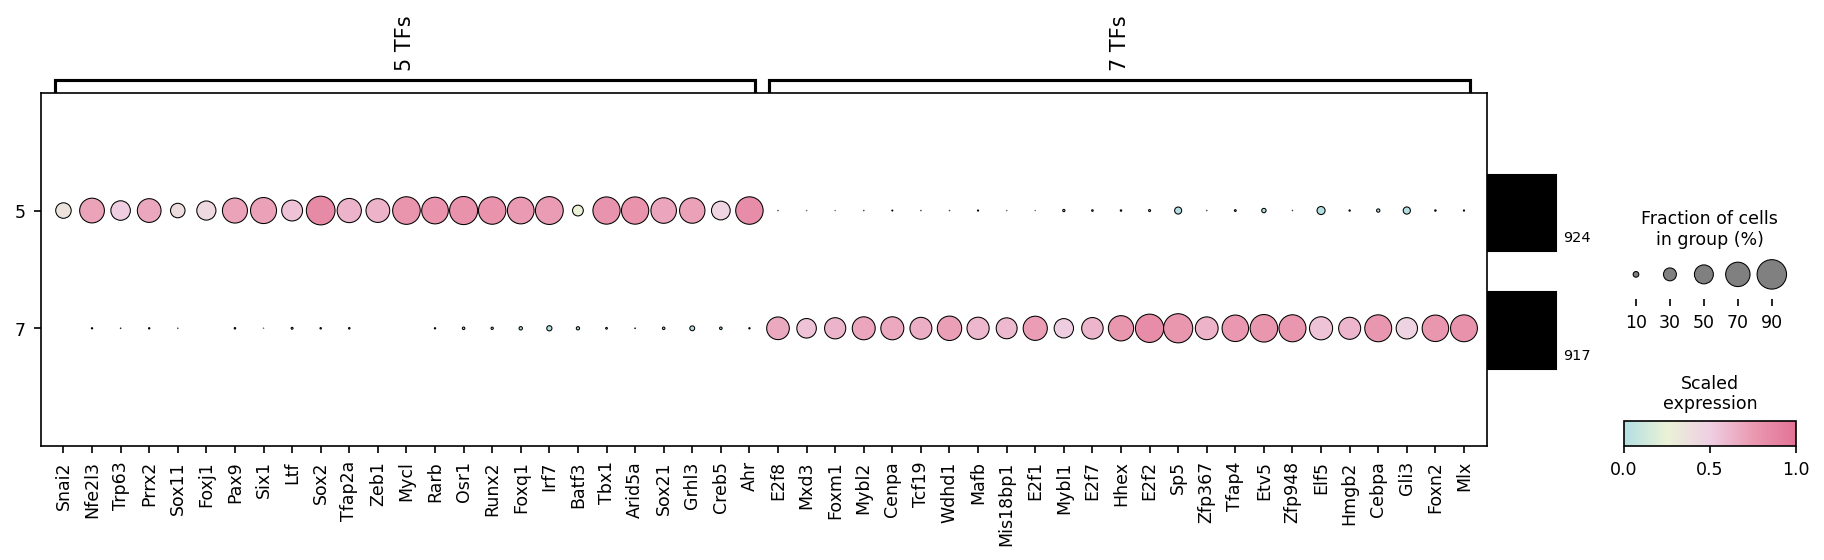

In [15]:
scaled = sc.pp.scale(YcontrolSub, copy=True)

# plot
order = ['5','7']

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", np.flip(['#e27396', '#ea9ab2', '#efcfe3', '#eaf2d7', '#b3dee2']))

rcParams['figure.dpi'] = 150
dp = sc.pl.dotplot(scaled, var_names = search_dict, groupby = 'leiden0_4', use_raw=False, vmin=0, vmax=1,
colorbar_title='Scaled\nexpression', swap_axes=False, categories_order=order, figsize=(15,3),return_fig=True)
dp.add_totals(color='black').style(dot_edge_color='black', dot_edge_lw=0.5, cmap=cmap).show()

#### Save the control branch point subset data

In [20]:
results_file = '/n/data2/bch/hemonc/ckim/AARON/20190715_KPY_timecourse/data_analysis/saved_files/YcontrolSub_C5andC7.h5ad'
YcontrolSub.write(results_file)

#### Use induvidual genes - more robust comparison

In [4]:
scaled = sc.pp.scale(at2Cells, copy=True)

True
Done. Total time (minutes): 0.1886810104052226
# genes and scores used for plotting: 10


<Figure size 432x288 with 0 Axes>

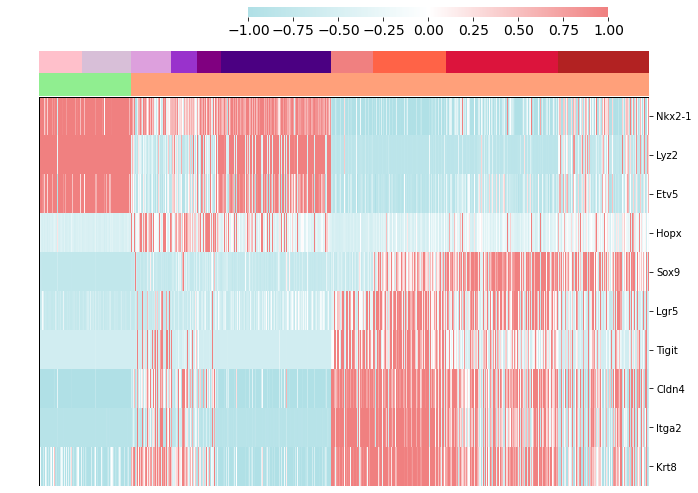

Done. Total time (minutes): 0.11093780199686686


In [7]:
start = time.time()

# Scale and create dataframe
input_df = pd.DataFrame(data=scaled.X, index=scaled.obs_names, columns=scaled.var_names)

df = input_df.copy()

# QC
print(len(df.columns) == len(at2Cells.var_names))

# Add pathways 
pathways=['leiden0_2','yfp_time_annot','fresh_org_annot'] 

for path in pathways:
    df[path]=scaled.obs[path]
    
end = time.time()
print(f'Done. Total time (minutes):', (end - start)/60)

start = time.time()

# manually order the dataframe using a numeric strategy
input2 = df['yfp_time_annot'].astype('object')
sorterIndex = {'KPY 0 dy':'0',
               'Y 0 dy':'1',
               'Y 4 dy':'2',
               'Y 7 dy':'3',
               'Y 10 dy':'4',
               'Y 14 dy':'5',
               'KPY 4 dy':'6',
               'KPY 7 dy':'7',
               'KPY 10 dy':'8',
               'KPY 14 dy':'9'}
results = input2.map(sorterIndex)
df['order_results'] = results # creates row with numeric values that can be sorted
df = df.sort_values(['order_results'], ascending = True) # reorder the dataframe

# Color annotations
# time point colors
color_input = df['yfp_time_annot'].astype('object')

lut = {
'KPY 0 dy':'pink','KPY 4 dy':'lightcoral','KPY 7 dy':'tomato','KPY 10 dy':'crimson','KPY 14 dy':'firebrick',
'Y 0 dy':'thistle','Y 4 dy':'plum','Y 7 dy':'darkorchid','Y 10 dy':'purple','Y 14 dy':'indigo'}

col_colors = color_input.map(lut)

# fresh/organoid colors
color_input3 = df['fresh_org_annot'].astype('object')
lut3 = {'Fresh':'lightgreen','Organoid':'lightsalmon'}
col_colors3 = color_input3.map(lut3)

# Remove columns that are not gene expression or signature scores (i.e. all NON-NUMERIC columns)
df_input = df.drop(['leiden0_2','yfp_time_annot','order_results','fresh_org_annot'], axis=1)
df_input = df_input.T # makes cells columns

genes = ['Nkx2-1','Lyz2','Etv5','Hopx','Sox9','Lgr5','Tigit','Cldn4','Itga2','Krt8'] # genes and pathways of interest
signatures = []
lst = genes + signatures

df1 = df_input.loc[lst] # keep PID_EPHA2_FWD_PATHWAY genes
print('# genes and scores used for plotting:', len(df1.index))

# Make clustermaps
vmin = -1
vmax = 1
base = 1.5
center = 0

#cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", (['white','lightgrey','black']))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", (['powderblue','white','lightcoral']))

plt.figure()

g1 = sb.clustermap(
df1, vmin=vmin, vmax=vmax, center=center, cmap=cmap, metric="euclidean", row_cluster=False, col_cluster=False,
figsize=(10,len(df1.index)/base), cbar_pos=(0.35, 1, .5, .02), # locxaxis,locyaxis,cbarwidth,cbarheight
col_colors=[col_colors, col_colors3], yticklabels=True, xticklabels=False, cbar_kws={"orientation": "horizontal"},
dendrogram_ratio=0.05, colors_ratio=0.05
                   ) 
ax = g1.ax_heatmap
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel("")
#ax.set_yticklabels()
#ax.set_yticks([])
ax.set_ylabel("", rotation=270, labelpad=25)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.axhline(y=0, color='black',linewidth=1) # border
ax.axhline(y=len(df1.index), color='black',linewidth=1) # border
ax.axvline(x=0, color='black',linewidth=1) # border
ax.axvline(x=len(df1.columns), color='black',linewidth=1) # border
plt.show()

end = time.time()
print(f'Done. Total time (minutes):', (end - start)/60)